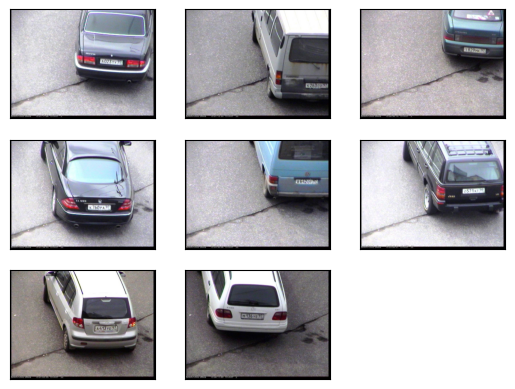

In [68]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np



def plot_many_2_rows(_images, row_len = 3):

    rows = (len(_images) + 3) // row_len
    for i in range(len(_images)):
        plt.subplot(rows, row_len, i+1)
        plt.imshow(_images[i], 'gray')
        plt.xticks([]), plt.yticks([])
    plt.show()



photos = ["IMG_0548.JPG",
          "IMG_0549.JPG",
          "IMG_0550.JPG",
          "IMG_1095.JPG",
          "IMG_1096.JPG",
          "IMG_1097.JPG",
          "IMG_1098.JPG",
          "IMG_1099.JPG",
        ]

images = []

for photo in photos:


    img = cv.imread(f"{photo}")
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    images.append(img)

    # plt.imshow(img)
    # plt.axis('off')
    # plt.show()

plot_many_2_rows(images)



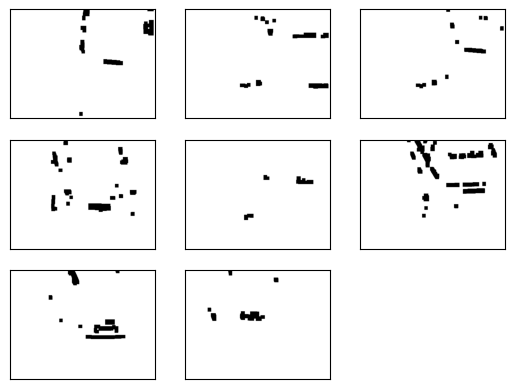

In [69]:
morphed_photos = []

for photo in photos:

    orig = cv.imread(photo, cv.IMREAD_GRAYSCALE)
    orig = cv.bitwise_not(orig)

    # Обрезаем края изображения чтобы не видеть лишних контуров
    # crop_pixels = 40
    # orig = orig[crop_pixels:-crop_pixels, crop_pixels:-crop_pixels]

    orig = cv.medianBlur(orig,5)

    img = cv.adaptiveThreshold(orig,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,4)

    n = 7
    kernel = np.ones((n,n), np.uint8)
    morphed = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)  # Закрытие - склеивает близкие белые области

    n = 18
    kernel = np.ones((n,n), np.uint8)
    morphed = cv.morphologyEx(morphed, cv.MORPH_CLOSE, kernel)  # Закрытие - склеивает близкие белые области

    morphed_photos.append(morphed)

plot_many_2_rows(morphed_photos, 3)



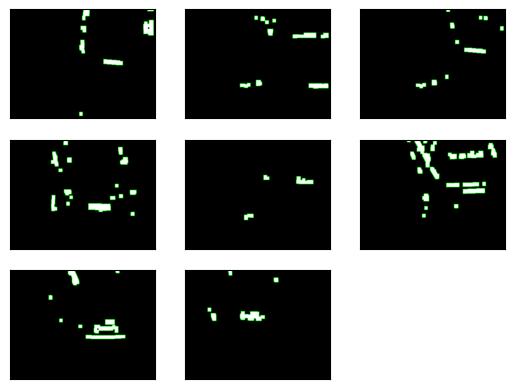

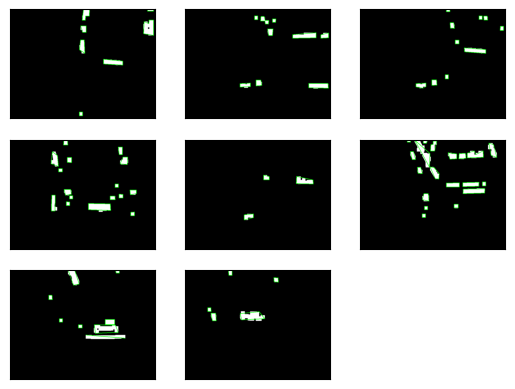

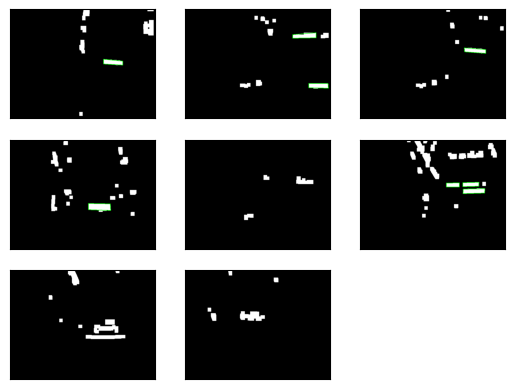

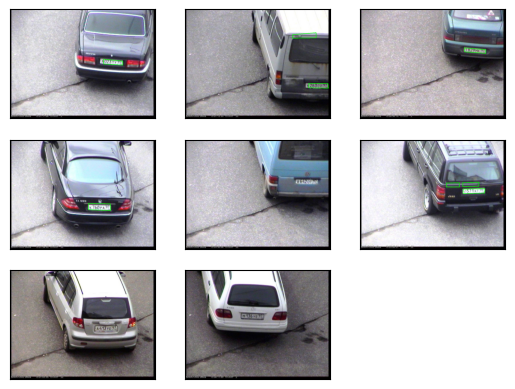

In [70]:
contour_images_1 = []
contour_images_2 = []
contour_images_3 = []
resulted_images = []


for i in range(len(morphed_photos)):

    photo = morphed_photos[i]
    original = cv.imread(photos[i])
    original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

    # Находим все контуры
    img = cv.bitwise_not(photo)
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Создаем копию исходного изображения для рисования
    img_with_all_contours_1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_with_all_contours_1, contours, -1, (0, 255, 0), 2)

    approximated = []

    for contour in contours:
        # Упрощаем контур до многоугольника
        epsilon = 0.05 * cv.arcLength(contour, True)
        approximated.append(cv.approxPolyDP(contour, epsilon, True))

    # Создаем копию исходного изображения для рисования
    img_with_all_contours_2 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_with_all_contours_2, approximated, -1, (0, 255, 0), 2)

    plate_contours = []
    for approx in approximated:
        x, y, w, h = cv.boundingRect(approx)
        aspect_ratio = w / h

        if 3.0 <= aspect_ratio <= 5.5 and len(approx) >= 4:
            plate_contours.append(approx)



    # Создаем копию исходного изображения для рисования
    img_with_all_contours_3 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_with_all_contours_3, plate_contours, -1, (0, 255, 0), 2)

    cv.drawContours(original, plate_contours, -1, (0, 255, 0), 2)

    contour_images_1.append(img_with_all_contours_1)
    contour_images_2.append(img_with_all_contours_2)
    contour_images_3.append(img_with_all_contours_3)
    resulted_images.append(original)



plot_many_2_rows(contour_images_1, 3)
plot_many_2_rows(contour_images_2, 3)
plot_many_2_rows(contour_images_3, 3)
plot_many_2_rows(resulted_images, 3)

